In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('../datasets/SuperStoreUS.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

1. Analyze shipping costs by ship mode and region

In [6]:
shipping_cost = df.groupby(['Region', 'Ship Mode'])['Shipping Cost'].agg(['sum', 'mean'])

In [7]:
shipping_cost

sum       mean
Region  Ship Mode                         
Central Delivery Truck  3529.47  42.523735
        Express Air      415.82   7.700370
        Regular Air     3172.51   7.395128
East    Delivery Truck  2925.18  47.180323
        Express Air      713.64  10.194857
        Regular Air     2892.95   8.483724
South   Delivery Truck  2669.85  43.062097
        Express Air      542.87   9.359828
        Regular Air     2457.39   7.631646
West    Delivery Truck  3013.30  44.313235
        Express Air      519.13   8.950517
        Regular Air     2452.49   7.129331

### 2. Calculate delivery time (Ship Date - Order Date) by ship mode


In [13]:
delivery_time = df['Ship Date'] - df['Order Date']
delivery_time

0      1 days
1      2 days
2      2 days
3      2 days
4      1 days
        ...  
1946   1 days
1947   1 days
1948   2 days
1949   0 days
1950   3 days
Length: 1951, dtype: timedelta64[ns]

### 3. Identify the most cost-effective shipping methods


In [ ]:
df.groupby('Ship Mode')['Shipping Cost'].mean().sort_values(ascending=True)

Ship Mode
Regular Air        7.642994
Express Air        9.131083
Delivery Truck    44.137455
Name: Shipping Cost, dtype: float64

### 4. Analyze the relationship between shipping cost and order value


📦 SHIPPING COST vs ORDER VALUE ANALYSIS
Step 1: Basic Statistics
------------------------------
Average Shipping Cost: $12.97
Average Order Value: $986.31
Correlation between Shipping Cost and Sales: 0.322


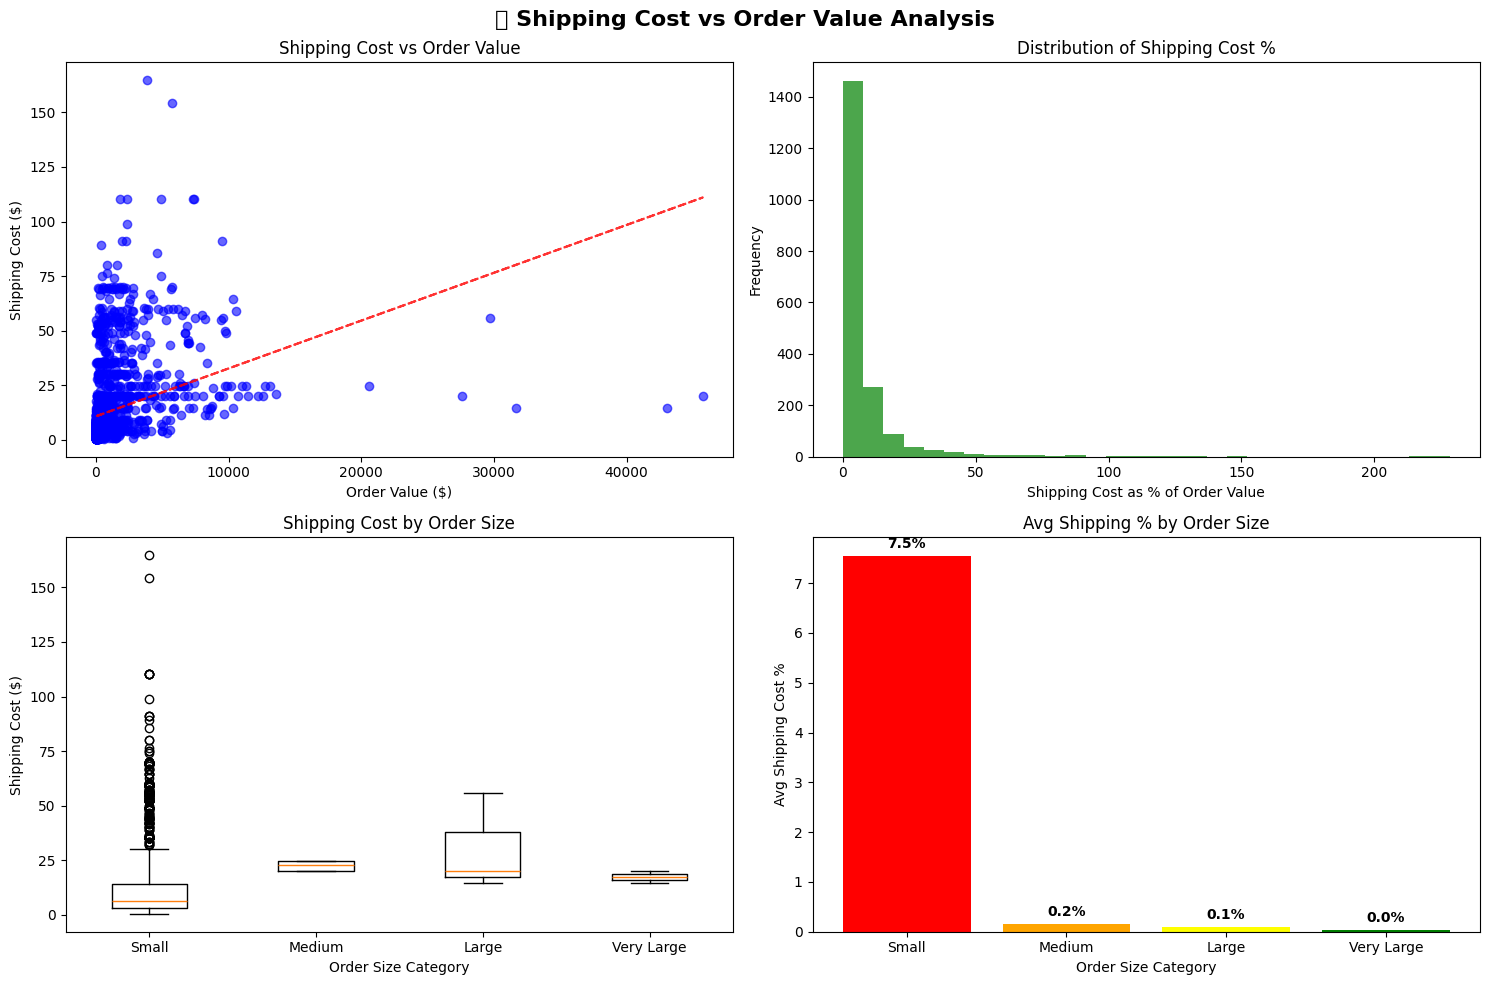

In [22]:
print("📦 SHIPPING COST vs ORDER VALUE ANALYSIS")
print("=" * 50)

# Step 1: Basic Statistics
print("Step 1: Basic Statistics")
print("-" * 30)

# Calculate basic metrics
avg_shipping_cost = df['Shipping Cost'].mean()
avg_order_value = df['Sales'].mean()
correlation = df['Shipping Cost'].corr(df['Sales'])

print(f"Average Shipping Cost: ${avg_shipping_cost:.2f}")
print(f"Average Order Value: ${avg_order_value:.2f}")
print(f"Correlation between Shipping Cost and Sales: {correlation:.3f}")

# Step 2: Calculate shipping cost as percentage of order value
df['Shipping_Cost_Percentage'] = (df['Shipping Cost'] / df['Sales']) * 100

# Step 3: Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📦 Shipping Cost vs Order Value Analysis', fontsize=16, fontweight='bold')

# Plot 1: Scatter plot
axes[0,0].scatter(df['Sales'], df['Shipping Cost'], alpha=0.6, color='blue')
axes[0,0].set_xlabel('Order Value ($)')
axes[0,0].set_ylabel('Shipping Cost ($)')
axes[0,0].set_title('Shipping Cost vs Order Value')

# Add trend line
z = np.polyfit(df['Sales'], df['Shipping Cost'], 1)
p = np.poly1d(z)
axes[0,0].plot(df['Sales'], p(df['Sales']), "r--", alpha=0.8)

# Plot 2: Shipping cost percentage distribution
axes[0,1].hist(df['Shipping_Cost_Percentage'], bins=30, alpha=0.7, color='green')
axes[0,1].set_xlabel('Shipping Cost as % of Order Value')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of Shipping Cost %')

# Plot 3: Box plot by order value ranges
# Create order value categories
df['Order_Size'] = pd.cut(df['Sales'], bins=4, labels=['Small', 'Medium', 'Large', 'Very Large'])
axes[1,0].boxplot([df[df['Order_Size'] == 'Small']['Shipping Cost'],
                   df[df['Order_Size'] == 'Medium']['Shipping Cost'],
                   df[df['Order_Size'] == 'Large']['Shipping Cost'],
                   df[df['Order_Size'] == 'Very Large']['Shipping Cost']],
                  labels=['Small', 'Medium', 'Large', 'Very Large'])
axes[1,0].set_xlabel('Order Size Category')
axes[1,0].set_ylabel('Shipping Cost ($)')
axes[1,0].set_title('Shipping Cost by Order Size')

# Plot 4: Average shipping cost percentage by order size
shipping_by_size = df.groupby('Order_Size')['Shipping_Cost_Percentage'].mean()
axes[1,1].bar(shipping_by_size.index, shipping_by_size.values, color=['red', 'orange', 'yellow', 'green'])
axes[1,1].set_xlabel('Order Size Category')
axes[1,1].set_ylabel('Avg Shipping Cost %')
axes[1,1].set_title('Avg Shipping % by Order Size')

# Add value labels on bars
for i, v in enumerate(shipping_by_size.values):
    axes[1,1].text(i, v + 0.1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()




🚚 SHIPPING EFFICIENCY METRICS
Step 1: Key Efficiency Metrics
------------------------------
Average Delivery Time: 1.9 days
Average Shipping Cost: $12.97
Average Cost per Day: $inf
Average Shipping Cost %: 7.50%
Revenue per Shipping Dollar: $92.57

Step 2: Efficiency by Ship Mode
------------------------------
                Delivery_Days  Shipping Cost    Sales  Cost_per_Day  \
Ship Mode                                                             
Delivery Truck           1.89          44.14  2869.95         23.35   
Express Air              1.80           9.13   604.38          5.07   
Regular Air              1.97           7.64   689.41          3.88   

                Cost_Percentage  Revenue_per_Ship_Dollar  
Ship Mode                                                 
Delivery Truck             1.54                    65.02  
Express Air                1.51                    66.20  
Regular Air                1.11                    90.24  


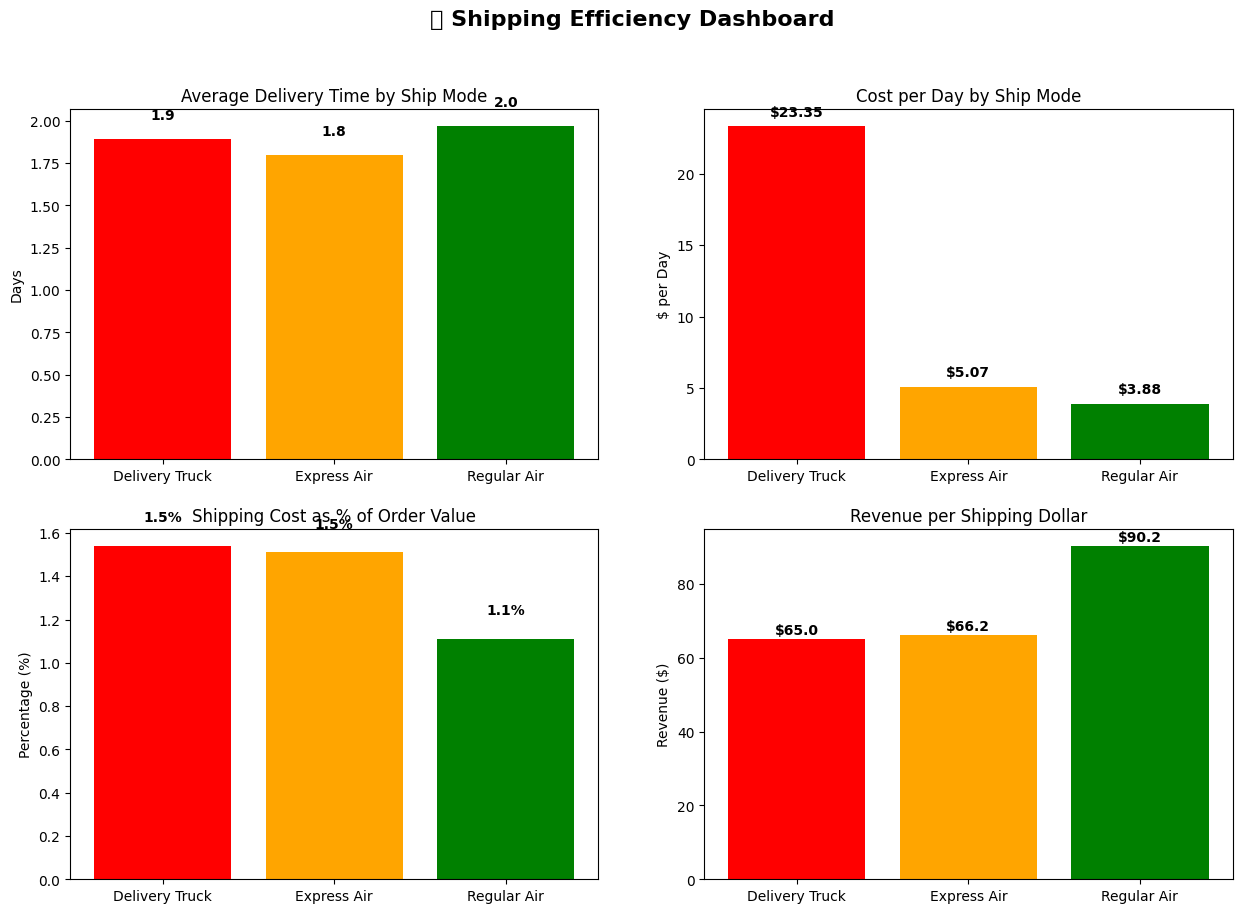


🏆 EFFICIENCY RANKINGS
📦 Fastest Delivery:
   1. Express Air: 1.8 days
   2. Delivery Truck: 1.9 days
   3. Regular Air: 2.0 days

💰 Most Cost Effective (lowest cost %):
   1. Regular Air: 1.1%
   2. Express Air: 1.5%
   3. Delivery Truck: 1.5%

⚡ Best Value (highest revenue per shipping $):
   1. Regular Air: $90.2
   2. Express Air: $66.2
   3. Delivery Truck: $65.0

📊 COMPOSITE EFFICIENCY SCORES
Overall Efficiency Ranking (higher = better):
   1. Regular Air: 347.8 points
   2. Express Air: 261.3 points
   3. Delivery Truck: 256.0 points

💡 KEY INSIGHTS & RECOMMENDATIONS
🚀 Fastest: Express Air (1.8 days)
💰 Cheapest: Regular Air (1.1% of order)
⭐ Best Value: Regular Air ($90.2 per shipping $)
🏆 Most Efficient Overall: Regular Air

📋 Business Recommendations:
   • Consider promoting Regular Air as it balances speed, cost, and value

📈 Summary Statistics:
   • Total shipments analyzed: 1,951
   • Average efficiency score: 288.3
   • Best performing ship mode: Regular Air
   • Potential

In [26]:
print("🚚 SHIPPING EFFICIENCY METRICS")
print("=" * 40)

# Step 1: Calculate delivery time
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# Step 2: Calculate key efficiency metrics
print("Step 1: Key Efficiency Metrics")
print("-" * 30)

# Basic efficiency metrics
avg_delivery_days = df['Delivery_Days'].mean()
avg_shipping_cost = df['Shipping Cost'].mean()
avg_order_value = df['Sales'].mean()

# Efficiency ratios
cost_per_day = df['Shipping Cost'] / df['Delivery_Days']
cost_per_dollar = (df['Shipping Cost'] / df['Sales']) * 100
revenue_per_shipping_dollar = df['Sales'] / df['Shipping Cost']

print(f"Average Delivery Time: {avg_delivery_days:.1f} days")
print(f"Average Shipping Cost: ${avg_shipping_cost:.2f}")
print(f"Average Cost per Day: ${cost_per_day.mean():.2f}")
print(f"Average Shipping Cost %: {cost_per_dollar.mean():.2f}%")
print(f"Revenue per Shipping Dollar: ${revenue_per_shipping_dollar.mean():.2f}")

# Step 3: Efficiency by Ship Mode
print("\nStep 2: Efficiency by Ship Mode")
print("-" * 30)

ship_mode_efficiency = df.groupby('Ship Mode').agg({
    'Delivery_Days': 'mean',
    'Shipping Cost': 'mean',
    'Sales': 'mean'
}).round(2)

# Calculate efficiency ratios by ship mode
ship_mode_efficiency['Cost_per_Day'] = (ship_mode_efficiency['Shipping Cost'] / 
                                       ship_mode_efficiency['Delivery_Days']).round(2)
ship_mode_efficiency['Cost_Percentage'] = (ship_mode_efficiency['Shipping Cost'] / 
                                          ship_mode_efficiency['Sales'] * 100).round(2)
ship_mode_efficiency['Revenue_per_Ship_Dollar'] = (ship_mode_efficiency['Sales'] / 
                                                  ship_mode_efficiency['Shipping Cost']).round(2)

print(ship_mode_efficiency)

# Step 4: Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('🚚 Shipping Efficiency Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Delivery time by ship mode
ship_modes = ship_mode_efficiency.index
delivery_times = ship_mode_efficiency['Delivery_Days']
colors = ['red', 'orange', 'green', 'blue']

bars1 = axes[0,0].bar(ship_modes, delivery_times, color=colors[:len(ship_modes)])
axes[0,0].set_title('Average Delivery Time by Ship Mode')
axes[0,0].set_ylabel('Days')


# Add value labels
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Cost per day by ship mode
bars2 = axes[0,1].bar(ship_modes, ship_mode_efficiency['Cost_per_Day'], 
                      color=colors[:len(ship_modes)])
axes[0,1].set_title('Cost per Day by Ship Mode')
axes[0,1].set_ylabel('$ per Day')

# Add value labels
for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'${height:.2f}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Shipping cost percentage by ship mode
bars3 = axes[1,0].bar(ship_modes, ship_mode_efficiency['Cost_Percentage'], 
                      color=colors[:len(ship_modes)])
axes[1,0].set_title('Shipping Cost as % of Order Value')
axes[1,0].set_ylabel('Percentage (%)')


# Add value labels
for i, bar in enumerate(bars3):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Plot 4: Revenue per shipping dollar
bars4 = axes[1,1].bar(ship_modes, ship_mode_efficiency['Revenue_per_Ship_Dollar'], 
                      color=colors[:len(ship_modes)])
axes[1,1].set_title('Revenue per Shipping Dollar')
axes[1,1].set_ylabel('Revenue ($)')


# Add value labels
for i, bar in enumerate(bars4):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'${height:.1f}', ha='center', va='bottom', fontweight='bold')

# plt.tight_layout()
plt.show()

# Step 5: Efficiency Rankings
print("\n" + "=" * 40)
print("🏆 EFFICIENCY RANKINGS")
print("=" * 40)

print("📦 Fastest Delivery:")
fastest = ship_mode_efficiency.sort_values('Delivery_Days')
for i, (mode, data) in enumerate(fastest.iterrows(), 1):
    print(f"   {i}. {mode}: {data['Delivery_Days']:.1f} days")

print("\n💰 Most Cost Effective (lowest cost %):")
cost_effective = ship_mode_efficiency.sort_values('Cost_Percentage')
for i, (mode, data) in enumerate(cost_effective.iterrows(), 1):
    print(f"   {i}. {mode}: {data['Cost_Percentage']:.1f}%")

print("\n⚡ Best Value (highest revenue per shipping $):")
best_value = ship_mode_efficiency.sort_values('Revenue_per_Ship_Dollar', ascending=False)
for i, (mode, data) in enumerate(best_value.iterrows(), 1):
    print(f"   {i}. {mode}: ${data['Revenue_per_Ship_Dollar']:.1f}")

# Step 6: Overall efficiency score (simple composite metric)
print("\n" + "=" * 40)
print("📊 COMPOSITE EFFICIENCY SCORES")
print("=" * 40)

# Normalize metrics (lower is better for delivery days and cost %, higher is better for revenue ratio)
ship_mode_efficiency['Speed_Score'] = (1 / ship_mode_efficiency['Delivery_Days']) * 100
ship_mode_efficiency['Cost_Score'] = (1 / ship_mode_efficiency['Cost_Percentage']) * 100
ship_mode_efficiency['Value_Score'] = ship_mode_efficiency['Revenue_per_Ship_Dollar'] * 10

# Calculate composite score (equal weights)
ship_mode_efficiency['Efficiency_Score'] = (
    ship_mode_efficiency['Speed_Score'] + 
    ship_mode_efficiency['Cost_Score'] + 
    ship_mode_efficiency['Value_Score']
) / 3

print("Overall Efficiency Ranking (higher = better):")
efficiency_ranking = ship_mode_efficiency.sort_values('Efficiency_Score', ascending=False)
for i, (mode, data) in enumerate(efficiency_ranking.iterrows(), 1):
    print(f"   {i}. {mode}: {data['Efficiency_Score']:.1f} points")

# Step 7: Key Insights and Recommendations
print("\n" + "=" * 40)
print("💡 KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 40)

fastest_mode = fastest.index[0]
cheapest_mode = cost_effective.index[0]
best_value_mode = best_value.index[0]
most_efficient = efficiency_ranking.index[0]

print(f"🚀 Fastest: {fastest_mode} ({fastest.loc[fastest_mode, 'Delivery_Days']:.1f} days)")
print(f"💰 Cheapest: {cheapest_mode} ({cost_effective.loc[cheapest_mode, 'Cost_Percentage']:.1f}% of order)")
print(f"⭐ Best Value: {best_value_mode} (${best_value.loc[best_value_mode, 'Revenue_per_Ship_Dollar']:.1f} per shipping $)")
print(f"🏆 Most Efficient Overall: {most_efficient}")

print(f"\n📋 Business Recommendations:")
if avg_delivery_days > 5:
    print("   • Focus on reducing delivery times")
if cost_per_dollar.mean() > 8:
    print("   • Shipping costs are high - negotiate better rates")
if fastest_mode != most_efficient:
    print(f"   • Consider promoting {most_efficient} as it balances speed, cost, and value")
else:
    print("   • Current fastest option is also most efficient overall")

print(f"\n📈 Summary Statistics:")
print(f"   • Total shipments analyzed: {len(df):,}")
print(f"   • Average efficiency score: {ship_mode_efficiency['Efficiency_Score'].mean():.1f}")
print(f"   • Best performing ship mode: {most_efficient}")
print(f"   • Potential savings: Focus on {cost_effective.index[-1]} alternatives")